In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
import time

# # input image dimensions
# img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
# import keras
# from keras.datasets import mnist

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


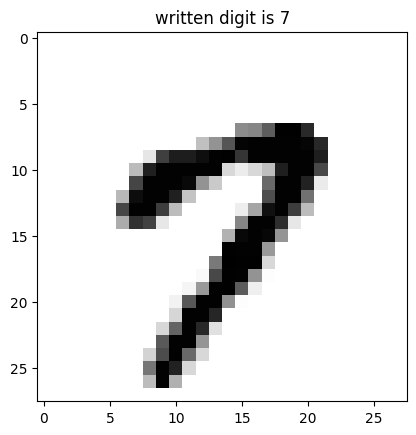

In [4]:
# example for image n 15
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('written digit is '+str(y_train[N]))

In [5]:
#Assignment 1

In [6]:
# Distance functions
def d_infty(image1, image2):
    return np.max(np.abs(image1 - image2))

def d_one(image1, image2):
    return np.sum(np.abs(image1 - image2))

def d_two(image1, image2):
    return np.sqrt(np.sum((image1 - image2)**2))


In [7]:
#Assignment 2

In [8]:
# Function to compute the distance matrix
def compute_distance_matrix(N, dist):
    D = np.zeros((N, N))
    
    for i in range(N):
        for j in range(i, N):
            distance = dist(x_train[i], x_train[j])
            D[i, j] = distance
            D[j, i] = distance
    
    return D

In [9]:
#Assignment 3

0.0
1.0
213.90980529785156
13.562871932983398


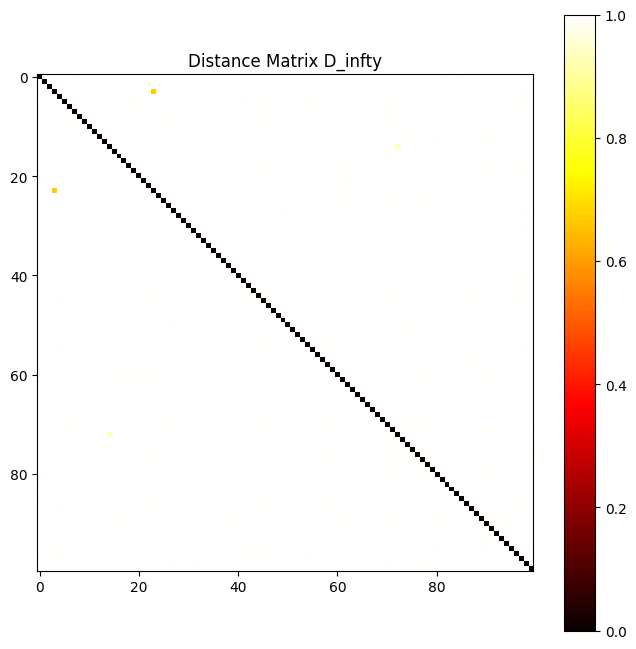

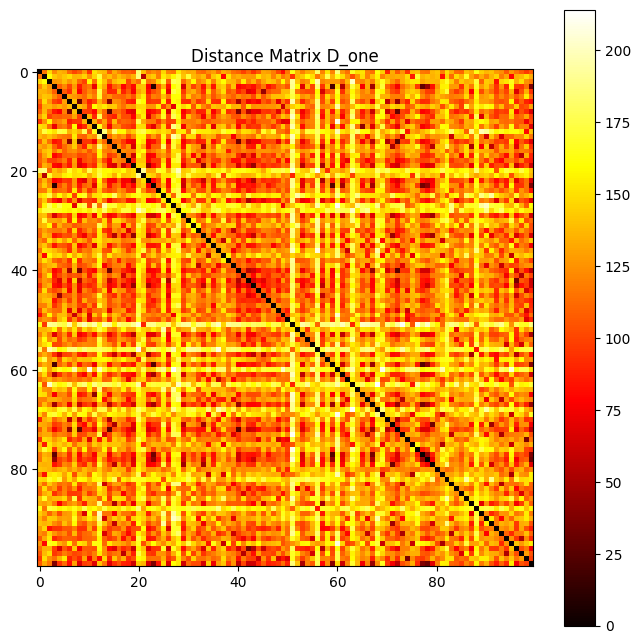

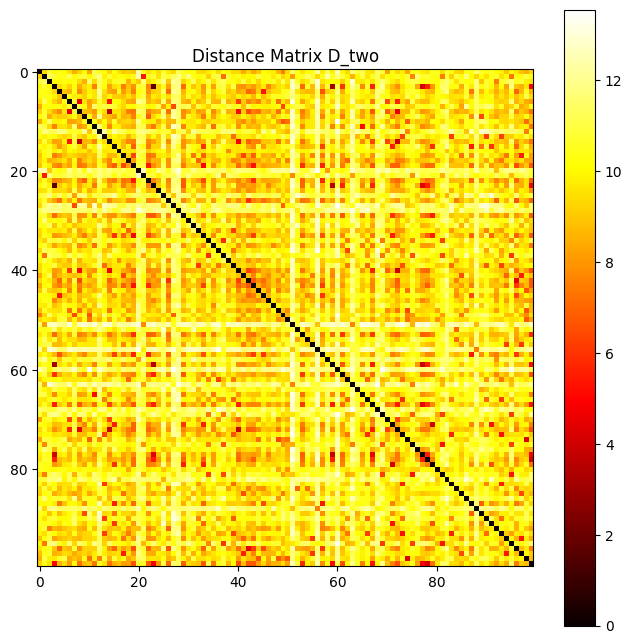

In [10]:
# Number of images to consider
N = 100

# Compute the distance matrices
D_infty = compute_distance_matrix(N, d_infty)
D_one = compute_distance_matrix(N, d_one)
D_two = compute_distance_matrix(N, d_two)

# Plotting function
def plot_distance_matrix(D, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(D, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

print(np.min(D_infty))
print(np.max(D_infty))
print(np.max(D_one))
print(np.max(D_two))

# Plot the distance matrices
plot_distance_matrix(D_infty, 'Distance Matrix D_infty')
plot_distance_matrix(D_one, 'Distance Matrix D_one')
plot_distance_matrix(D_two, 'Distance Matrix D_two')

In [ ]:
#Assignment 4

In [11]:
# Function to compute the leave-one-out error
def compute_error(D, y_train, N):
    error_counter = 0
    
    for i in range(N):
        # Find the nearest neighbor (index j) for the ith sample
        nearest_neighbor = np.argmin([D[i, j] if i != j else np.inf for j in range(N)])
        
        # Increment error counter if the predicted label does not match the true label
        if y_train[nearest_neighbor] != y_train[i]:
            error_counter += 1
    
    # Return the error rate
    return error_counter / N

# Compute the error for each distance matrix
error_infty = compute_error(D_infty, y_train, N)
error_one = compute_error(D_one, y_train, N)
error_two = compute_error(D_two, y_train, N)

# Print the errors
print(f'Error rate for D_infty: {error_infty}')
print(f'Error rate for D_one: {error_one}')
print(f'Error rate for D_two: {error_two}')

Error rate for D_infty: 0.58
Error rate for D_one: 0.17
Error rate for D_two: 0.17


In [ ]:
#Assignment 5

Time Taken = 77.26898956298828


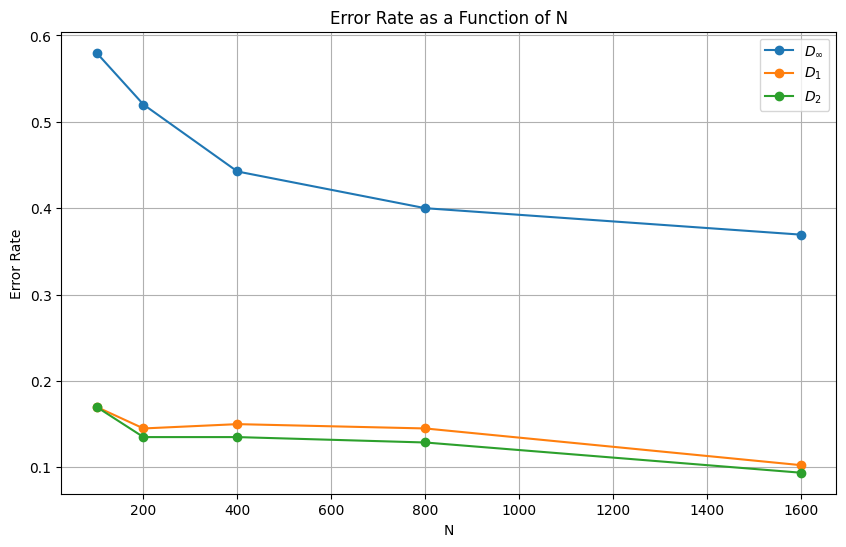

[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]


In [12]:
# Values of N to consider
Ns = [100, 200, 400, 800, 1600]

# Lists to store error rates for each distance function
errors_infty = []
errors_one = []
errors_two = []
start_time = time.time()
# Compute errors for each value of N
for N in Ns:
    D_infty = compute_distance_matrix(N, d_infty)
    D_one = compute_distance_matrix(N, d_one)
    D_two = compute_distance_matrix(N, d_two)
    
    error_infty = compute_error(D_infty, y_train, N)
    error_one = compute_error(D_one, y_train, N)
    error_two = compute_error(D_two, y_train, N)
    
    errors_infty.append(error_infty)
    errors_one.append(error_one)
    errors_two.append(error_two)
end_time = time.time()
print(f"Time Taken = {end_time - start_time}")


# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(Ns, errors_infty, label=r'$D_\infty$', marker='o')
plt.plot(Ns, errors_one, label=r'$D_1$', marker='o')
plt.plot(Ns, errors_two, label=r'$D_2$', marker='o')
plt.xlabel('N')
plt.ylabel('Error Rate')
plt.title('Error Rate as a Function of N')
plt.legend()
plt.grid(True)
plt.show()

# Print the error rates
error_matrix = np.vstack((errors_infty, errors_one, errors_two)).T
print(error_matrix)


In [ ]:
#Assignment 6

Time Taken = 38.11172127723694


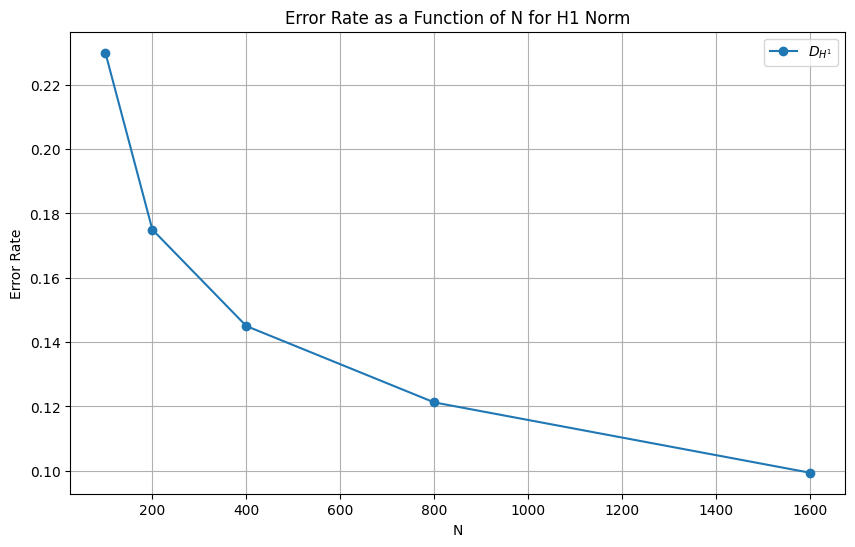

[0.23     0.175    0.145    0.12125  0.099375]


In [14]:
# Function to normalize the image
def normalize_image(image):
    integral = np.sum(image)
    #simps(simps(integrand, dx=1), dx=1)
    if integral == 0:
        return image  # to avoid division by zero
    return image / integral

# Function to compute the gradients of the image
def compute_gradients(image):
    grad_x = np.gradient(image, axis=0)
    grad_y = np.gradient(image, axis=1)
    return grad_x, grad_y

# Function to compute the H1 norm distance
def h1_distance(grad_a_x, grad_a_y, grad_b_x, grad_b_y, a, b):
    grad_diff_x = grad_a_x - grad_b_x
    grad_diff_y = grad_a_y - grad_b_y
    
    grad_diff_squared = grad_diff_x**2 + grad_diff_y**2
    diff_squared = (a - b)**2
    
    h1_norm = np.sqrt(np.sum(grad_diff_squared + diff_squared))
    
    return h1_norm

# Function to compute the distance matrix for H1 norm
def compute_h1_distance_matrix(x_train_norm, gradients, N):
    D = np.zeros((N, N))
    
    for i in range(N):
        for j in range(i, N):
            distance = h1_distance(
                gradients[i][0], gradients[i][1],
                gradients[j][0], gradients[j][1],
                x_train_norm[i], x_train_norm[j]
            )
            D[i, j] = distance
            D[j, i] = distance
    
    return D

# Function to compute the leave-one-out error
def compute_error(D, y_train, N):
    error_counter = 0
    
    for i in range(N):
        # Find the nearest neighbor (index j) for the ith sample
        nearest_neighbor = np.argmin([D[i, j] if i != j else np.inf for j in range(N)])
        
        # Increment error counter if the predicted label does not match the true label
        if y_train[nearest_neighbor] != y_train[i]:
            error_counter += 1
    
    # Return the error rate
    return error_counter / N
    
start_time = time.time()
# Normalize the training images
x_train_norm = np.array([normalize_image(img) for img in x_train])

# Compute the gradients of the normalized training images
gradients = [compute_gradients(img) for img in x_train_norm]

# Values of N to consider
Ns = [100, 200, 400, 800, 1600]

# List to store error rates for H1 norm
errors_h1 = []

# Compute errors for each value of N for H1 norm
for N in Ns:
    D_h1 = compute_h1_distance_matrix(x_train_norm, gradients, N)
    error_h1 = compute_error(D_h1, y_train, N)
    errors_h1.append(error_h1)
end_time = time.time()
print(f"Time Taken = {end_time - start_time}")

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(Ns, errors_h1, label='$D_{H^1}$', marker='o')
plt.xlabel('N')
plt.ylabel('Error Rate')
plt.title('Error Rate as a Function of N for H1 Norm')
plt.legend()
plt.grid(True)
plt.show()

# Print the error rates
print(np.array(errors_h1))

#NOTE: results are not better... maybe I did not use the best algorithms ( np.gradient , np.sum)

In [ ]:
#Assignment 7

In [1]:
# I'm not able to check well this last part of assignment

In [ ]:
from sklearn.neighbors import BallTree

# Map distance functions to names
dist_functions = {
    "d_infty": d_infty,
    "d_one": d_one,
    #"d_two": d_two,
    #"d_H1": d_H1
}

# Function to compute error rate
def compute_error_rate(tree, x_train, y_train, x_test, y_test):
    error_counter = 0
    for i in range(len(x_test)):
        dist, ind = tree.query([x_test[i].flatten()], k=1)
        if y_train[ind[0][0]] != y_test[i]:
            error_counter += 1
    return error_counter / len(x_test)

# Function to run experiments
def run_experiments(x_train, y_train, x_test, y_test, dist_func, N_values):
    error_rates = []
    for N in N_values:
        # Building the BallTree
        x_train_subset = x_train[:N].reshape(N, -1)
        y_train_subset = y_train[:N]
        
        tree = BallTree(x_train_subset, metric='pyfunc', func=dist_func)
        
        # Compute error rate
        error_rate = compute_error_rate(tree, x_train_subset, y_train_subset, x_test.reshape(len(x_test), -1), y_test)
        error_rates.append(error_rate)
        
    return error_rates


# Set values of N
N_values = [3200,6400]

# Run experiments and plot results
plt.figure(figsize=(10, 6))
for dist_name, dist_func in dist_functions.items():
    error_rates = run_experiments(x_train, y_train, x_test, y_test, dist_func, N_values)
    plt.plot(N_values, error_rates, label=dist_name)

plt.xlabel('N')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. N for Different Distance Metrics')
plt.legend()
plt.show()




In [ ]:
# Experiment with multiple neighbors
def compute_error_rate_knn(tree, x_train, y_train, x_test, y_test, k):
    error_counter = 0
    for i in range(len(x_test)):
        dist, ind = tree.query([x_test[i].flatten()], k=k)
        nearest_labels = y_train[ind[0]]
        predicted_label = np.bincount(nearest_labels).argmax()
        if predicted_label != y_test[i]:
            error_counter += 1
    return error_counter / len(x_test)

# Run experiments with multiple neighbors and plot results
k_values = [1, 3, 5]  # Number of neighbors to consider
plt.figure(figsize=(10, 6))

for dist_name, dist_func in dist_functions.items():
    for k in k_values:
        error_rates = []
        for N in N_values:
            x_train_subset = x_train[:N].reshape(N, -1)
            y_train_subset = y_train[:N]
            
            tree = BallTree(x_train_subset, metric='pyfunc', func=dist_func)
            error_rate = compute_error_rate_knn(tree, x_train_subset, y_train_subset, x_test.reshape(len(x_test), -1), y_test, k)
            error_rates.append(error_rate)
        
        plt.plot(N_values, error_rates, label=f'{dist_name}, k={k}')

plt.xlabel('N')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. N for Different Distance Metrics and k-Nearest Neighbors')
plt.legend()
plt.show()